In [2]:
import seaborn
import pandas



In [3]:
#titanic dataset load from seaborn library
data=pandas.read_csv('/content/titanic.csv')
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
data.columns #this are the all columns of titanic dataset

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [ ]:
data.shape#total number of rows and columns
#here are 891 rows and 15 columns

(891, 15)

In [ ]:
data.head()# head is a method in pandas returns the first few rows of a DataFrame 'data'. By default, it returns the first five rows

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
data['survived'].value_counts()#Total 342 passengers are survived and 549 passengers did not survived

survived
0    549
1    342
Name: count, dtype: int64

In [ ]:
data['sex'].value_counts()#There are 577 male and 314 female

sex
male      577
female    314
Name: count, dtype: int64

In [ ]:
'''
491 passengers are from third class
216 passengers are from first class
184 passengers are from second class
'''
data['class'].value_counts()

class
Third     491
First     216
Second    184
Name: count, dtype: int64

In [ ]:
'''
644 passengers are board from Southampton port
168 passengers are board from Cherbourg port
77 passengers are board from Queenstown port
'''
data['embark_town'].value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

In [ ]:
'''
deck= ra specific level or floor of the ship
Here are showing on which deck how many passengers are present
for e.g on deck C 59 passengers are present
'''
data['deck'].value_counts()

deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: count, dtype: int64

In [ ]:
'''
here 537 passengers are travelling alone
354 passengers are travelling with family
'''
data['alone'].value_counts()


alone
True     537
False    354
Name: count, dtype: int64

In [ ]:
'''
here we get aggregate values of age for 'sex' column
'''
data.groupby('sex').agg({
    'age':['mean','max','min','std','count']
    })

age                             
             mean   max   min        std count
sex                                           
female  27.915709  63.0  0.75  14.110146   261
male    30.726645  80.0  0.42  14.678201   453

In [ ]:
data['alone'][(data['sibsp'] == 0) & (data['parch'] == 0)]

2      True
4      True
5      True
6      True
11     True
       ... 
884    True
886    True
887    True
889    True
890    True
Name: alone, Length: 537, dtype: bool

In [ ]:
data['alone'][(data['sibsp'] != 0) & (data['parch'] != 0)]

7      False
10     False
13     False
16     False
24     False
       ...  
856    False
863    False
869    False
871    False
888    False
Name: alone, Length: 142, dtype: bool

In [ ]:
'''
 here we find the maximum and minimum
 values of the pclass column
 and also count the number of entries for each deck.
 '''
data.groupby('deck').agg({
    'pclass':['max','min','count']
    })

pclass          
        max min count
deck                 
A         1   1    15
B         1   1    47
C         1   1    59
D         2   1    33
E         3   1    32
F         3   2    13
G         3   3     4

In [ ]:
'''
for each class we get the aggregate values of age
'''
data.groupby('class').agg({
    'age':['mean','max','min','std','count']})

age                             
             mean   max   min        std count
class                                         
First   38.233441  80.0  0.92  14.802856   186
Second  29.877630  70.0  0.67  14.001077   173
Third   25.140620  74.0  0.42  12.495398   355

In [4]:
'''
mean value of age for each'sex' and 'class' column
'''
pandas.pivot_table(data, index='sex', columns='class', values='age', aggfunc='mean')

class,First,Second,Third
sex,,,
female,34.611765,28.722973,21.750000
male,41.281386,30.740707,26.507589


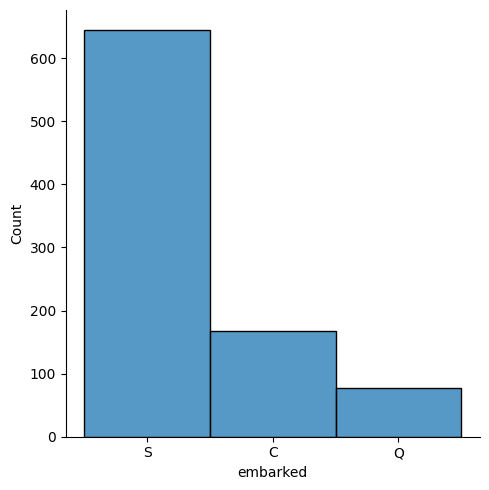

In [ ]:
seaborn.displot(data,x='embarked')

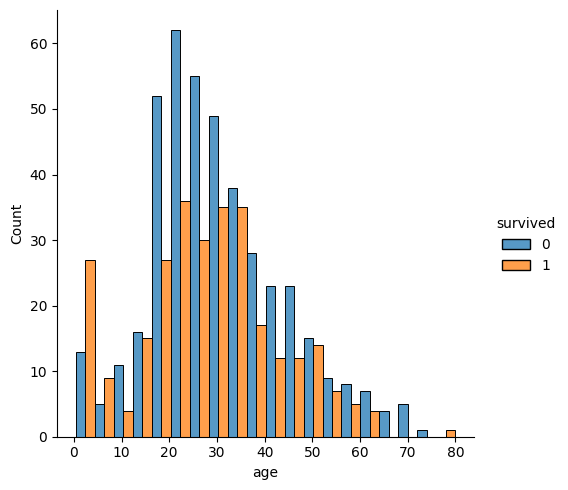

In [ ]:
seaborn.displot(data,x='age',hue='survived',multiple='dodge')

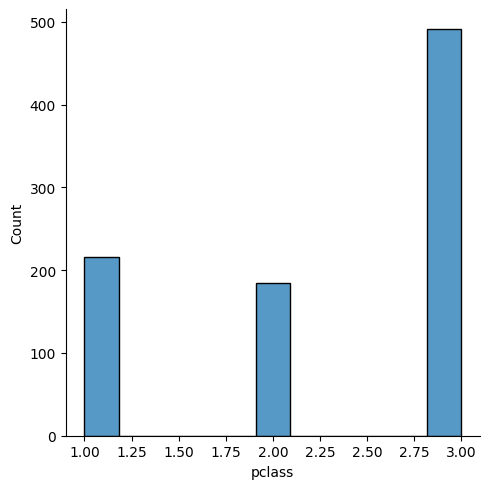

In [ ]:
seaborn.displot(data,x='pclass')

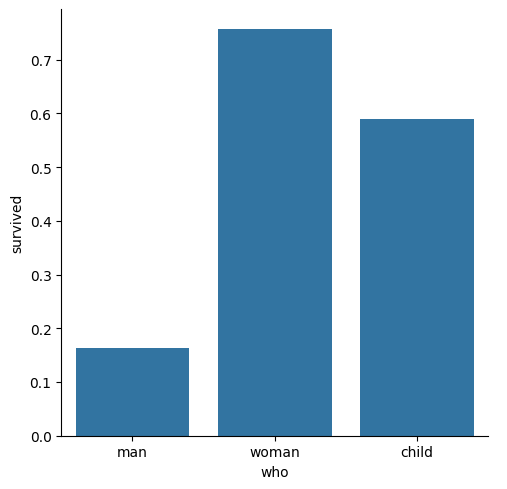

In [ ]:
seaborn.catplot(data,x='who',y='survived',kind='bar',errorbar=None)# generate a categorical bar plot showing the average survival rate for  'who' column (man, woman, child).

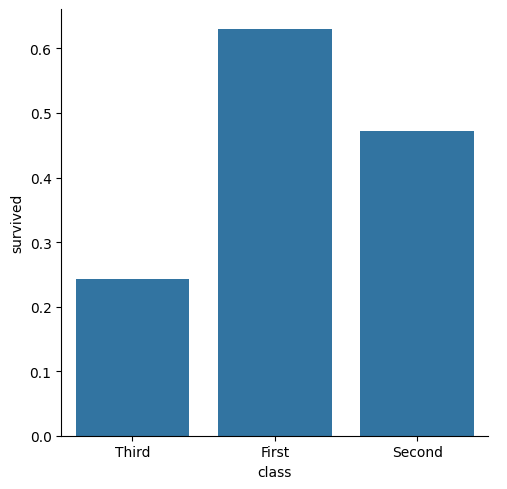

In [9]:
seaborn.catplot(data,x='class',y='survived',kind='bar',errorbar=None)

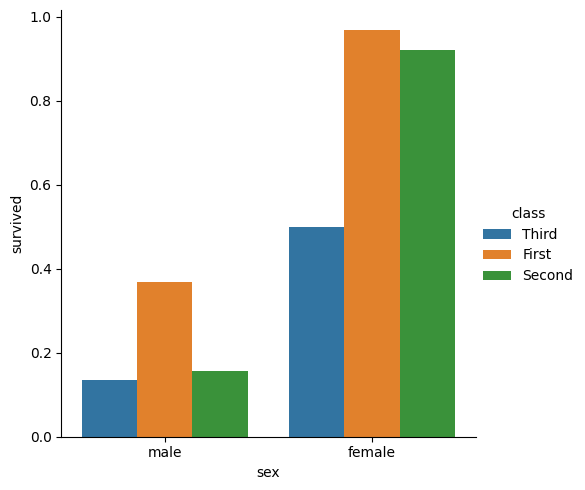

In [ ]:
seaborn.catplot(data,kind='bar',x='sex',y='survived',hue='class',errorbar=None)

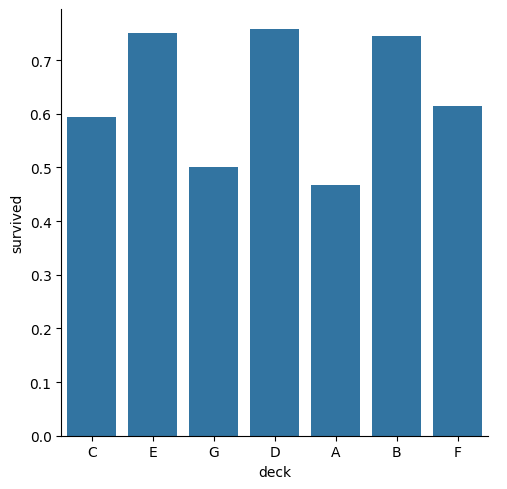

In [ ]:
seaborn.catplot(data,kind='bar',x='deck',y='survived',errorbar=None)

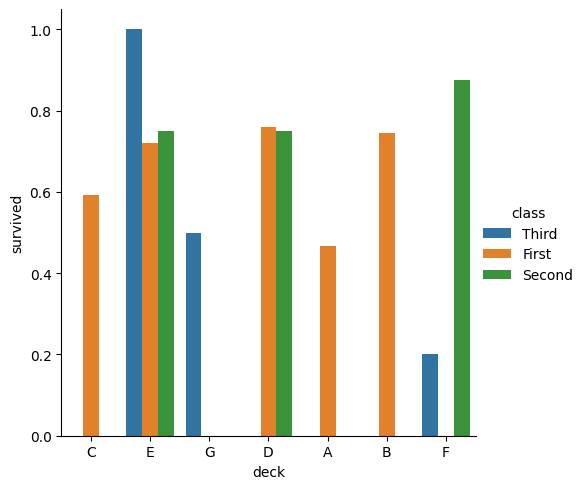

In [ ]:
seaborn.catplot(data,kind='bar',x='deck',y='survived',errorbar=None,hue='class')

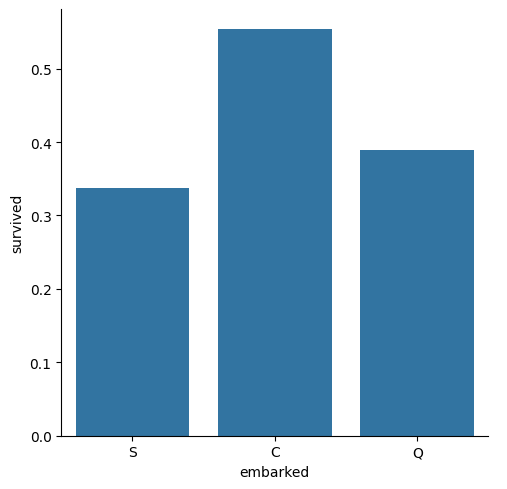

In [ ]:
seaborn.catplot(data,x='embarked',y='survived',kind='bar',errorbar=None)

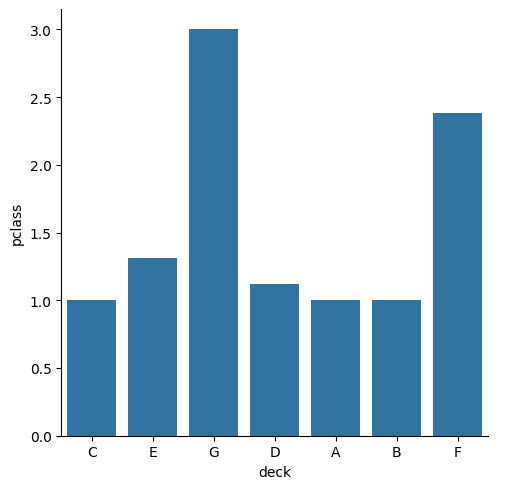

In [5]:
seaborn.catplot(data,x='deck',y='pclass',kind='bar',errorbar=None)